# **Glassdoor Salary exploration for financial analyst positions in the UK**
#### -- Project Status: [Active]
#### Project phases:
- [x] Adapt web scraper for data for model
- [x] Clean data for analysis
- [x] Analyze data
- [x] submit findings
- [ ] Scale and Build Machine Learning Model
- [ ] Construct API
- [ ] Host API using flask

## Project Intro
The objective of this project is to further understand what it takes to be a financial analyst in London. This exercise will serve as a gateway to those seeking to become analyst themselves as well as create an entry point adapting a machine learning model in predicting what role may be expected in relation to the different variables. 

### Methods Used
* Inferential Statistics
* Machine Learning
* Data Visualization
* Predictive Modeling
* etc.

### Technologies
* Python
* Pandas, jupyter
* Numpy
* Matplotlib
* Nltk
* Wordcloud 
* Seaborn 
* Sklean
* Statsmodels
* Selenium

## Project Description
As we move closer to the full cycle of graduates moving into the work force, the question has been posed is what does it take/what is it like to be a financial analyst? Some questions we plan on answering include:

- What kind of salary should be expected?
- What positions are the most popular?
- Types of companies Hiring?
- What industries are the most popular?
- Similarities between different roles?
- Other questions we might want answered as we explore the data some more?

    ### things to note:

* The data was gathered from Glassdoor job postings on 6/7/2020 via web scraper with the use of the Selenium Python library. As such, COVID-19  has remained a constant factor in our lives and should be taken into consideration.
* -1 represents data that wasn't specified in the job posting
* The sample size for this data set was 1,000 entries

## Needs of this project

- frontend developers
- data exploration/descriptive statistics
- data processing/cleaning
- statistical modeling
- writeup/reporting
- Machine Learning implementation  


## Contributing  Members

**Team Leads (Contacts) : [Samuel Lawrence]: https://www.linkedin.com/in/samuel-lawrence-a29977b5/**


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import figure
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [2]:
df0 = pd.read_csv('Financial Analyst Stack 2.csv')  # Reading the CSV for Fincaial Analysis data
df1 = pd.read_csv('Financial Analyst Stack 3.csv')
df2 = pd.read_csv('Financial Analyst Stack 4.csv') 
df3 = pd.read_csv('Financial Analyst Stack 5.csv')
df4 = pd.read_csv('Financial Analyst Stack 6.csv') 
df = pd.concat([df0, df1, df2, df3, df4], ignore_index=True)
df.drop_duplicates()
df = df.dropna(subset=['Salary Estimate'])
df = df.drop(['Unnamed: 0'], axis = 1) #dropping 0's column


In [3]:
df.shape

(1460, 14)

In [4]:
df.tail()

Job Title Salary Estimate  \
5195         Senior Business Support Analyst              -1   
5196  Finance Analyst (Commercial Reporting)              -1   
5197           Commercial Analyst- Marketing              -1   
5198           Senior Market Pricing Analyst              -1   
5199             Analyst, Deals Intelligence              -1   

                                        Job Description  Rating  \
5195  King’s College Hospital NHS Foundation Trust p...     3.2   
5196  The role works within the Finance team and is ...     3.5   
5197  Commercial Analyst- Marketing, Windsor, Berksh...     5.0   
5198  Description\n\nAxa Retail is recruiting a Seni...     4.2   
5199  Deals Intelligence, a part of Refinitiv's M&A ...     3.5   

                                           Company Name  \
5195  King’s College Hospital NHS Foundation Trust\n3.2   
5196                                   J Sainsbury\n3.5   
5197                   Vitae Financial Recruitment\n5.0   
5198                                        AXA UK\n4.2   
5199                                     Refinitiv\n3.5   

                                  Location             Headquarters  \
5195                       London, England   London, United Kingdom   
5196                       London, England   London, United Kingdom   
5197  Windsor, South East England, England  Watford, United Kingdom   
5198                       London, England   London, United Kingdom   
5199                       London, England   London, United Kingdom   

                         Size  Founded  Type of ownership  \
5195  5001 to 10000 employees   1999.0           Hospital   
5196         10000+ employees   1869.0   Company - Public   
5197        1 to 50 employees   2006.0  Company - Private   
5198  5001 to 10000 employees   1996.0  Company - Private   
5199         10000+ employees   2018.0  Company - Private   

                             Industry                  Sector  \
5195  Healthcare Services & Hospitals              Healthcare   
5196     Grocery Shops & Supermarkets                  Retail   
5197           Staffing & Outsourcing       Business Services   
5198              Insurance Operators               Insurance   
5199     Computer Hardware & Software  Information Technology   

                         Revenue             Competitors  
5195     £5 to £10 million (GBP)                      -1  
5196     £5 to £10 billion (GBP)  ASDA, Tesco, Morrisons  
5197  Less than £1 million (GBP)                      -1  
5198    Unknown / Non-Applicable               RSA Group  
5199     £5 to £10 billion (GBP)                      -1

In [5]:
df = df[df['Salary Estimate'] != '-1'] #Drop -1 values

In [6]:
df['Salary_Data'] = df['Salary Estimate'].apply(lambda x: x.split('(')[0]) #Cleaning sallary Data

In [7]:
df['Salary_Data'] = df['Salary_Data'].apply(lambda x: x.replace('K','000').replace('£','')) #Removing symbolls 

In [8]:
df['Max_Salary'] = df['Salary_Data'].apply(lambda x: int(x.split('-')[0])) #Adding Max Salary Column

df['Min_Salary'] = df['Salary_Data'].apply(lambda x: int(x.split('-')[1])) #Adding Min Salary Column

df['Average_Salary'] = (df.Max_Salary+df.Min_Salary)/2 #Adding Average Salary Column

df['Company Name'] = df['Company Name'].apply(lambda x: x.split('\n')[0]) #Cleaning Company name

In [9]:
df.head() # Ensure our new columns are present 

Job Title             Salary Estimate  \
7                    Analyst  £28K-£42K (Glassdoor Est.)   
11       Commodities Analyst  £53K-£96K (Glassdoor Est.)   
16               B2B Analyst  £27K-£52K (Glassdoor Est.)   
19  Equity Financial Analyst  £36K-£65K (Glassdoor Est.)   
29      Business Analyst, UK  £33K-£35K (Glassdoor Est.)   

                                      Job Description  Rating  \
7   We are always looking for exceptional talent t...     3.4   
11  Job Description\n\nCommodities Analysts work c...     5.0   
16  The Company\n\nAddison Lee Group provides seam...     2.2   
19  A Career in Long/Short Equities at Point72\nLo...     3.9   
29  We are currently seeking a self-motivated rese...     4.3   

            Company Name             Location            Headquarters  \
7         Fahrenheit 212      London, England            New York, NY   
11               Citadel      London, England             Chicago, IL   
16           Addison Lee  Paddington, England  London, United Kingdom   
19               Point72      London, England            Stamford, CT   
29  Lifescience Dynamics      London, England  London, United Kingdom   

                      Size  Founded  Type of ownership  \
7      51 to 200 employees   2006.0  Company - Private   
11  1001 to 5000 employees   1990.0  Company - Private   
16  1001 to 5000 employees   1975.0  Company - Private   
19  1001 to 5000 employees   2014.0  Company - Private   
29       1 to 50 employees   2004.0  Company - Private   

                                 Industry                      Sector  \
7                              Consulting           Business Services   
11                                    NaN                         NaN   
16                                Haulage  Transportation & Logistics   
19  Investment Banking & Asset Management                     Finance   
29              Biotech & Pharmaceuticals   Biotech & Pharmaceuticals   

                       Revenue  \
7     £10 to £25 million (GBP)   
11   £50 to £100 million (GBP)   
16  £100 to £500 million (GBP)   
19    Unknown / Non-Applicable   
29    Unknown / Non-Applicable   

                                          Competitors   Salary_Data  \
7                                                 NaN  28000-42000    
11  Soros Fund Management, D. E. Shaw & Co. - Inve...  53000-96000    
16                                                NaN  27000-52000    
19                                                NaN  36000-65000    
29                                                NaN  33000-35000    

    Max_Salary  Min_Salary  Average_Salary  
7        28000       42000         35000.0  
11       53000       96000         74500.0  
16       27000       52000         39500.0  
19       36000       65000         50500.0  
29       33000       35000         34000.0

###### Average Salary of all positions

In [10]:
df.Average_Salary.mean()

49131.26491646778

#### Having cleaned our data we can now look at some statistics:
##### industry's Hiring:

In [11]:
df.Industry.value_counts()[:20] 

Investment Banking & Asset Management      54
Consulting                                 43
Internet                                   41
Insurance Agencies & Brokerages            34
Staffing & Outsourcing                     30
Financial Transaction Processing           25
IT Services                                25
Computer Hardware & Software               19
Real Estate                                18
Accounting                                 16
Financial Analytics & Research             15
Biotech & Pharmaceuticals                  12
Lending                                    11
Enterprise Software & Network Solutions    10
Publishing                                  8
Advertising & Marketing                     7
Insurance Operators                         6
Haulage                                     4
Logistics & Supply Chain                    4
Department, Clothing, & Shoe Shops          3
Name: Industry, dtype: int64

###### Company age

In [12]:
df['Age of the company in years'] = df.Founded.apply(lambda x: x if x <1 else 2020 - x)
df['Age of the company in years'].value_counts()[:10]

26.0     40
17.0     34
13.0     29
21.0     25
31.0     23
51.0     18
30.0     17
170.0    16
10.0     15
Name: Age of the company in years, dtype: int64

###### The amount of jobs that ask for AWS

In [13]:
df['AWS'] = df['Job Description'].apply(lambda x: 1 if 'aws' in x.lower() else 0)
df.AWS.value_counts()

0    391
1     28
Name: AWS, dtype: int64

###### The amount of jobs that mention modeling in the description

In [14]:
df['Modeling'] = df['Job Description'].apply(lambda x: 1 if 'modeling' in x.lower() else 0)
df.Modeling.value_counts()

0    384
1     35
Name: Modeling, dtype: int64

###### The amount of jobs that mention Equity in the description

In [15]:
df['Equity'] = df['Job Description'].apply(lambda x: 1 if 'equity' in x.lower() else 0)
df.Equity.value_counts()

0    386
1     33
Name: Equity, dtype: int64

###### The amount of jobs that mention SQL in the description

In [16]:
df['SQL'] = df['Job Description'].apply(lambda x: 1 if 'sql' in x.lower() else 0)
df.SQL.value_counts()

0    296
1    123
Name: SQL, dtype: int64

###### The amount of jobs that mention Fintech in the description

In [17]:
df['Fintech'] = df['Job Description'].apply(lambda x: 1 if 'fintech' in x.lower() else 0)
df.Fintech.value_counts()

0    409
1     10
Name: Fintech, dtype: int64

###### The amount of jobs that mention Python in the description

In [18]:
df['python'] = df['Job Description'].apply(lambda x: 1 if 'python' in x.lower() else 0)
df.python.value_counts()

0    351
1     68
Name: python, dtype: int64

###### The amount of jobs that Risk modeling in the description

In [19]:
df['Risk'] = df['Job Description'].apply(lambda x: 1 if 'risk' in x.lower() else 0)
df['Risk'].value_counts()

1    214
0    205
Name: Risk, dtype: int64

###### The amount of jobs that mention Consulting in the description

In [20]:
df['Consulting'] = df['Job Description'].apply(lambda x: 1 if 'consulting' in x.lower() else 0)
df.Consulting.value_counts()

0    314
1    105
Name: Consulting, dtype: int64

###### The amount of jobs that mention Excel in the description

In [21]:
df['Excel'] = df['Job Description'].apply(lambda x: 1 if 'excel' in x.lower() else 0)
df.Excel.value_counts()

1    347
0     72
Name: Excel, dtype: int64

In [22]:
def type_of_analyst(job):
    if 'invetement' in job.lower():
        return 'invetement analyst'
    if 'stratergy' in job.lower():
        return 'stratergy analyst'    
    if 'financial' in job.lower():
        return 'financial analyst'    
    if 'credit' in job.lower():
        return 'credit analyst'
    if 'quantitative' in job.lower():
        return 'quantitative analyst'
    if 'business analyst' in job.lower():
        return 'business analyst'
    if 'risk' in job.lower():
        return 'risk analyst'
    if 'fp&a' in job.lower():
        return 'fp&a'
    if 'equity' in job.lower():
        return 'equity analyst'
    if 'compliance' in job.lower():
        return 'compliance analyst'
    if 'estate' in job.lower():
        return 'real estate analyst'
    else: 
        return 'Other Analyst'
    
def seniority_status(job):
    if 'senior' in job.lower() or 'sr.' in job.lower() or 'sr' in job.lower() or 'lead' in job.lower() or 'head' in job.lower():
        return 'Senior Status'
    elif 'jr' in job.lower() or 'junior' in job.lower() or 'jr.' in job.lower():
        return 'Junior Status'
    if 'vp' in job.lower() or 'vice president' in job.lower():
        return 'Vice President'
    else: 
        return 'Unspesified Title'
    

In [23]:
df['Type'] = df['Job Title'].apply(type_of_analyst)

###### Types of analysts that are being hired 

In [24]:
df.Type.value_counts()

Other Analyst           148
business analyst        123
financial analyst        94
credit analyst           14
fp&a                     12
real estate analyst      12
quantitative analyst      8
risk analyst              4
compliance analyst        3
equity analyst            1
Name: Type, dtype: int64

In [25]:
df['Seniority_Status'] = df['Job Title'].apply(seniority_status)

###### Seniority of analysts

In [26]:
df.Seniority_Status.value_counts()

Unspesified Title    269
Senior Status        145
Vice President         5
Name: Seniority_Status, dtype: int64

##### Most Job Posting locations

In [27]:
df['Location'].value_counts()[:10]

London, England        412
Paddington, England      7
Name: Location, dtype: int64

##### Biggest competitors

In [28]:
df['Competitors'].value_counts()[:15]

-1                                                                                      58
Google, Microsoft, Walmart                                                              37
Accenture, Deloitte, Appirio                                                            24
Global Payments, First Data, Adyen                                                      22
Soros Fund Management, D. E. Shaw & Co. - Investment Firm, Fortress Investment Group    17
Amazon, PwC, McKinsey & Company                                                         16
JLL, CBRE, Cushman & Wakefield                                                          15
Moody's Corporation, Bloomberg L.P., S&P Global Ratings                                  9
Renaissance Technologies LLC, Two Sigma, AQR Capital Management                          8
Economist Intelligence Unit, Roubini Global Economics                                    7
Cisco Systems, Huawei Technologies, IBM                                                  7

In [29]:
df['Competitors'].head()

7                                                   NaN
11    Soros Fund Management, D. E. Shaw & Co. - Inve...
16                                                  NaN
19                                                  NaN
29                                                  NaN
Name: Competitors, dtype: object

##### Rating Histogram

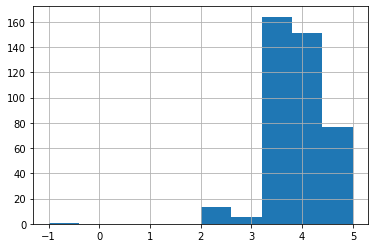

In [30]:
df.Rating.hist()

###### Average Salary estimated by glassdoor

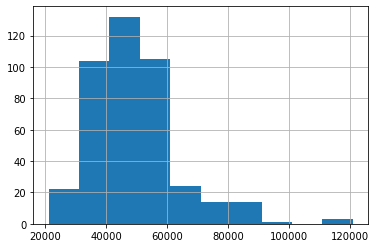

In [31]:
df.Average_Salary.hist()

##### Correlation between Ratings, Salary, Founded date

In [32]:
df_cor = df[['Rating','Average_Salary','Founded']].corr() 
df_cor.head()

Rating  Average_Salary   Founded
Rating          1.000000        0.199009  0.228592
Average_Salary  0.199009        1.000000  0.011863
Founded         0.228592        0.011863  1.000000

#### Heatmap

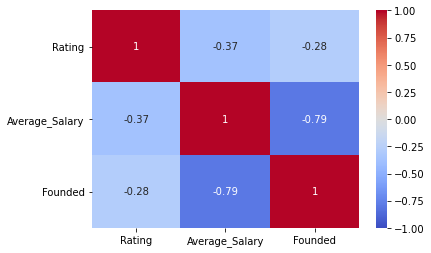

In [33]:
sns.heatmap(df_cor.corr(), annot = True, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm')

##### Categorical  Charts 

In [34]:
df_cat = df[['Location','Size','Type of ownership','Revenue','Industry','Sector','Type','Seniority_Status']] #Charts we're creating

graph for Location: total = 2


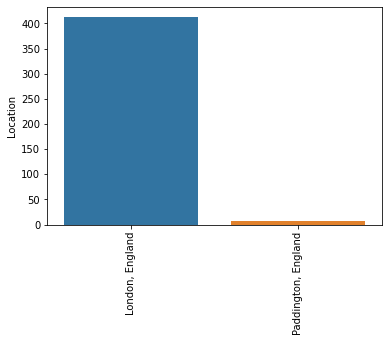

graph for Size: total = 8


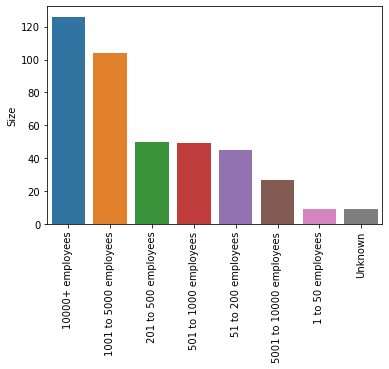

graph for Type of ownership: total = 5


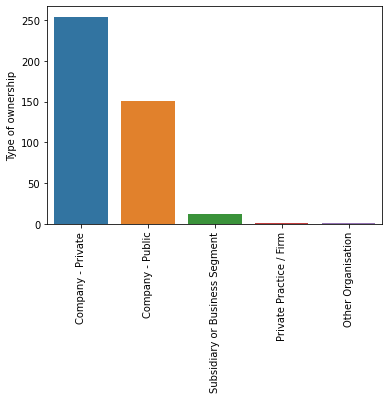

graph for Revenue: total = 10


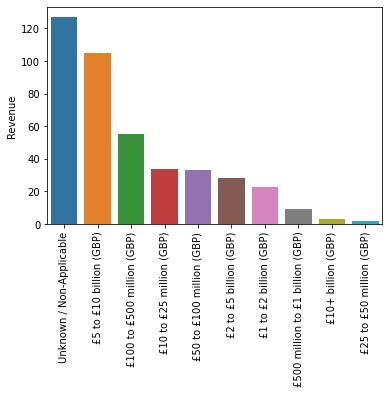

graph for Industry: total = 27


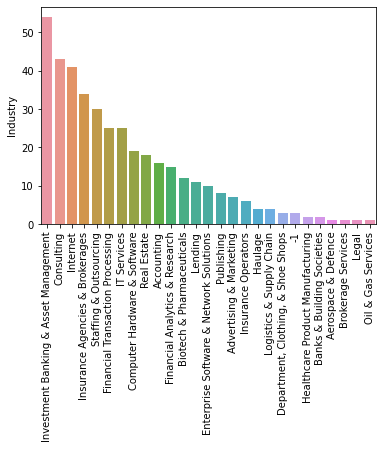

graph for Sector: total = 14


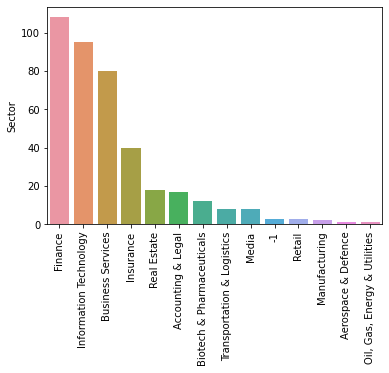

graph for Type: total = 10


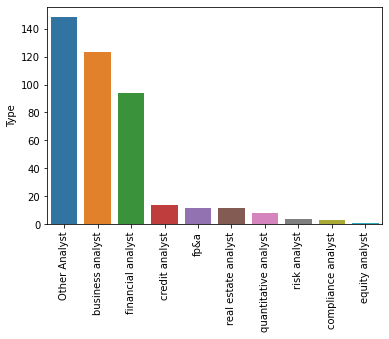

graph for Seniority_Status: total = 3


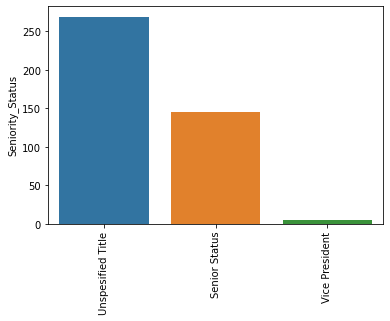

In [35]:
for Categorical_Values in df_cat.columns:
    cat_num = df_cat[Categorical_Values].value_counts()
    print('graph for %s: total = %d' % (Categorical_Values, len(cat_num)))
    chart = sns.barplot(x=cat_num.index, y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()

##### Pivot Table

In [36]:
pd.pivot_table(df, index = ['Type','Seniority_Status'], values = 'Average_Salary').sort_values('Average_Salary', ascending = False)

Average_Salary
Type                 Seniority_Status                 
quantitative analyst Vice President      121000.000000
business analyst     Vice President       80000.000000
quantitative analyst Unspesified Title    75666.666667
credit analyst       Unspesified Title    68875.000000
business analyst     Senior Status        65125.000000
fp&a                 Unspesified Title    56818.181818
risk analyst         Unspesified Title    53500.000000
Other Analyst        Senior Status        53097.560976
business analyst     Unspesified Title    49737.804878
credit analyst       Senior Status        49400.000000
risk analyst         Senior Status        49000.000000
fp&a                 Senior Status        48000.000000
financial analyst    Senior Status        47894.736842
Other Analyst        Vice President       46000.000000
                     Unspesified Title    44790.476190
financial analyst    Unspesified Title    40857.142857
compliance analyst   Senior Status        37750.000000
equity analyst       Unspesified Title    36500.000000
compliance analyst   Unspesified Title    30500.000000
real estate analyst  Senior Status        21000.000000

##### WordCloud 

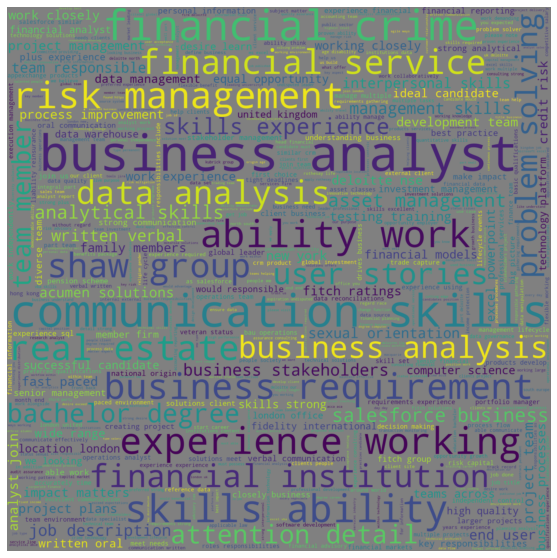

In [37]:
words = " ".join(df['Job Description'])

def punctuation_stop(text):
    """remove punctuation and stop words"""
    filtered = []
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    for w in word_tokens:
        if w not in stop_words and w.isalpha():
            filtered.append(w.lower())
    return filtered

words_filtered = punctuation_stop(words)
unwanted = ['the', 'role','support','skills ability', 'including']
text = " ".join([ele for ele in words_filtered if ele not in unwanted])
wc= WordCloud(background_color="gray", random_state=1,stopwords=STOPWORDS, max_words = 500, width =2000, height = 2000)
wc.generate(text)
plt.figure(figsize=[10,10])
plt.imshow(wc, interpolation="bilinear")
plt.axis('off')
plt.show()

In [38]:
df.to_csv('Fin Machine Learning Ready.csv') #Saving as CSV